# Clustering

## Première Partie

Dans cette première partie nous allons effectué un clustering sur les données que vous connaissez déjà bien : les données *iris*.  
Ce jeu de données est idéal pour démarrer car il y a peu de données, les variables sont facilement compréhensibles et il n'y a pas de données manquantes à devoir gérer pour lancer les modèles de clustering.  


1. Import des bibliothèques

In [66]:
import pandas as pd
import numpy as np
import sklearn.metrics as sm
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans #nous utiliserons sklearn pour le Machine Learning : télécharger la bibliothèque en amont
from sklearn import datasets

2. Import des données

In [67]:
iris = datasets.load_iris()

In [68]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

L'affichage des données n'est pas sous la forme que l'on connait et manipule habituellement, à savoir un tableau. Regardons donc de plus prêt.

In [69]:
print(iris)
print(iris.data)
print(iris.feature_names)
print(iris.target)
print(iris.target_names)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

3. Transformation des données en tabulaire

Nous allons donc découper le dataset comme suit : 
    - La variable X contient les observations, il s’agit d’une matrice de taille 150*4
    - Les étiquettes sont dans une variable Y

In [70]:
#Stocker les données en tant que DataFrame Pandas 
x=pd.DataFrame(iris.data)
# définir les noms de colonnes
x.columns=['Sepal_Length','Sepal_width','Petal_Length','Petal_width']
y=pd.DataFrame(iris.target)
y.columns=['Targets']

4. Construction du modèle

** Rappel ** Kmeans en Python : http://scikitlearn.org/stable/modules/generated/sklearn.cluster.KMeans.html

Exécution de l’algorithme k-means se fait par la commande suivante :
    KMeans(n_clusters=8, init=’k-means++’, n_init=10, max_iter=300,
            tol=0.0001, precompute_distances=’auto’, n_jobs=1)

Avec comme paramètres : 
    - n_clusters: le nombre de classes (par défaut n_clusters =8).
    - init: {'k-means ++', 'random' ou un ndarray} : est une méthode d'initialisation, par défaut 'k-means ++':
    - 'K-means ++’ : sélectionne intelligemment les centres initiaux afin d'accélérer la convergence.
    - 'Random': choisit k observations (rangées) au hasard parmi les données pour les centres initiaux.
    - ‘ndarray’ : passe en paramètre les centres initiaux sous la forme (n_clusters, n_features).
    - n_jobs=1 permet d’exécuter les n_init itérations en parallèle.
    - cluster_centers_ : contient les attributs en sortie : les centres, labels_ : les numéros de cluster de chaque observation, inertie : la somme des distances au carré des observations vers leur centre de cluster le plus proche.

Les commandes suivantes permettent :
    - La ligne km = KMeans(n_clusters=n_cluster) permet de créer un modèle pour un ensemble de k centres,
    - L'instruction km.fit(X) utilise les données pour définir le modèle de clustering,
    - predict(X) prédit le cluster le plus proche auquel appartient chaque échantillon.

Maintenant que nous avons mis nos données dans un format clair, nous pouvons utilisé la fonction kmeans() pour implémenter un modèle de clustering de type k-means.  
Pour ce faire, nous devrons initialement choisir le nombre de clusters (groupes) que nous souhaitons. 

Commencez avec 2 clusters puis exécutez jusqu'à la fin les lignes de commandes afin de voir la représentation graphique associée.


In [71]:
#Création modèle
model=KMeans(n_clusters=2)
#adapter le modèle de données
model.fit(x)
model.predict(x)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

5. Affichage des clusters/groupes attribués par l'algorithme

In [72]:
print(model.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


6. Visualisation du résultat

In [73]:
plt.scatter(x.Petal_Length, x.Petal_width)


Maintenant regardons la même visualisation mais avec 1 couleur = 1 clusters, pour déterminer si l'algorithme se rapproche de la réalité d'un point de vue visuel dans un premier temps.

In [74]:
colormap=np.array(['Red','green','blue'])
plt.scatter(x.Petal_Length, x.Petal_width,c=colormap[y.Targets],s=40)
plt.scatter(x.Petal_Length, x.Petal_width,c=colormap[model.labels_],s=40)

Changez le nombre de clusters à la Q4 et refaites les questions suivantes.

*Question* : que pouvez-vous en dire ? A votre avis quel nombre de cluster est le plus judicieux ?

## Partie 2 : clustering Marketing

Dans cet exercice nous allons partie de données de client d'un magasin de type Hypermarché.  
Le but de cet exercice est de determiner des groupes de clients afin de pouvoir dans un second temps, leur proposer des opérations commerciales (email, bons de réduction, etc) ciblées

1. Importer vos librairies de travail

2.  importer le dataset Mall_customer.csv

In [75]:
data = pd.read_csv("C:/Users/aliso/Documents/6. Enseignement/ORT/2. Python et ML/Mall_Customers.csv")

In [76]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


3. Supprimer la colonne CustomerID de votre dataset (fonction [drop()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)) et stockez l'ensemble de votre dataset dans la variable data_clean (sans cela les lignes de commandes suivantes risquent d'afficher une erreur)

In [77]:
data_clean = data.drop(columns=["CustomerID"])
data_clean.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


4. Transposer la colonne Genre afin d'avoir deux colonnes : Male et Female et des 0 et 1 associé

In [78]:
from sklearn.preprocessing import StandardScaler

xnum = data_clean.loc[:,data_clean.columns != "Genre"]
xcat = data_clean.loc[:,"Genre"]

sc= StandardScaler()
xnum = pd.DataFrame(sc.fit_transform(xnum), columns=xnum.columns)

data_clean = pd.merge(xnum,xcat, left_index=True, right_index=True)
data_clean = pd.get_dummies(data_clean, drop_first=True)
data_clean.head()

,Age,Annual Income (k$),Spending Score (1-100),Genre_Male
0,-1.424569,-1.738999,-0.434801,1
1,-1.281035,-1.738999,1.195704,1
2,-1.352802,-1.700830,-1.715913,0
3,-1.137502,-1.700830,1.040418,0
4,-0.563369,-1.662660,-0.395980,0


*question* : commentez chacune des lignes précédentes pour bien comprendre ce qui est fait.

5. Sélection du nombre de cluster optimal

Pour sélectionner le nombre de cluster optimal, vous vous doutez bien que nous ne pouvons pas le faire manuellement en testant toutes les combinaisons possibles.  
Il existe donc des méthodes qui nous permettent d'identifier le meilleur résultat. L'une d'elle s'ppelle le diagramme en coude ou Elbow Method.  
Ce graphique doit permettre d'identifier à partir de combien de clusters la pente s'aplatie presque (aka le coude)

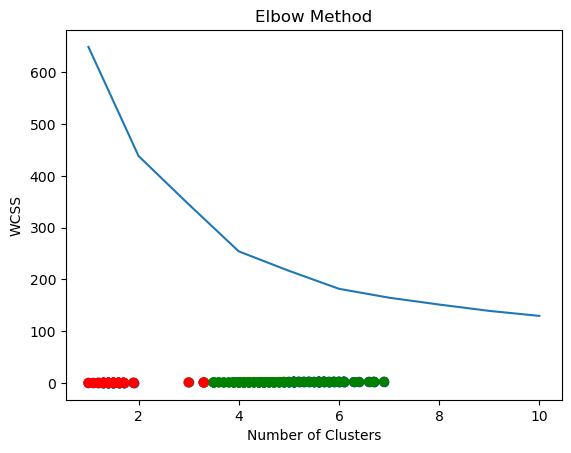

In [79]:
# Using the Elbow method to find the optimal number K of clusters
from sklearn.cluster import KMeans
wcss =  []
for i in range (1,11): 
    kmeans = KMeans(n_clusters= i, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(data_clean)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

*question* : combien de clusters choisissez-vous ?

6. Créer votre modèle kmeans en repartant de la Q4 de la partie 1

In [80]:
kmeans = KMeans(n_clusters= 4, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
kmeans.fit(data_clean)

KMeans(n_clusters=4, random_state=0)

7. Interprétation des résultats

Nous allons visualiser une carte de chaleur avec la répartition des clusters que vous avez déterminé.   
Pour chaque indicateur (=colonne en X) vous avez donc le nombre de client correspondant. 

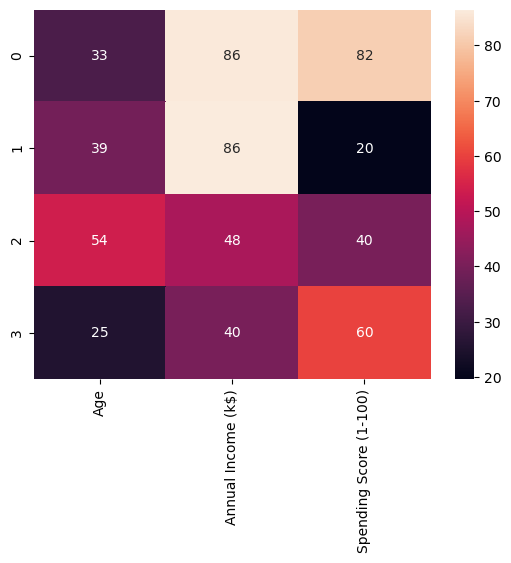

In [81]:
import seaborn as sns
sns.heatmap(pd.DataFrame(sc.inverse_transform(kmeans.cluster_centers_[:,:-1]),
                         columns=data_clean.columns[:-1]),annot=True)
plt.show()

*Question* : essayez d'interpréter/de dégager les différents groupes de clients que vous avez.

8. Visualisations

Nous allons rester sur 5 clusters et renommer chacun des clusters en fonctions de leurs profils clients.

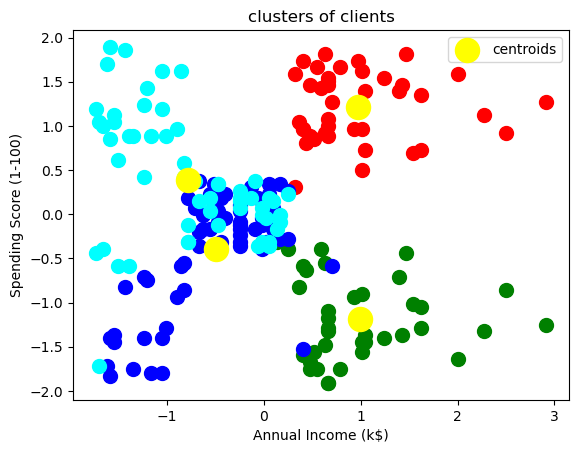

In [82]:
# Visualizing the clusters Sur Spending Score && Annual Income
y_kmeans = kmeans.fit_predict(data_clean)

plt.scatter(data_clean.iloc[:, 1][y_kmeans == 0], data_clean.iloc[:, 2][y_kmeans == 0], s = 100, c = 'red')
plt.scatter(data_clean.iloc[:, 1][y_kmeans == 1], data_clean.iloc[:, 2][y_kmeans == 1], s = 100, c = 'green')
plt.scatter(data_clean.iloc[:, 1][y_kmeans == 2], data_clean.iloc[:, 2][y_kmeans == 2], s = 100, c = 'blue')
plt.scatter(data_clean.iloc[:, 1][y_kmeans == 3], data_clean.iloc[:, 2][y_kmeans == 3], s = 100, c = 'cyan')
plt.scatter(data_clean.iloc[:, 1][y_kmeans == 4], data_clean.iloc[:, 2][y_kmeans == 4], s = 100, c = 'magenta')
#plt.scatter(X.iloc[:, 1][y_kmeans == 5], X.iloc[:, 2][y_kmeans == 5], s = 100, c = 'black', label = 'New')
plt.scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2], s = 300, c = 'yellow', label = 'centroids')
plt.title('clusters of clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

*Question* Que pouvez-vous en dire sur les variables Spending Score et Annual Income sur le clustering ?

In [83]:
data_clean

,Age,Annual Income (k$),Spending Score (1-100),Genre_Male
0,-1.424569,-1.738999,-0.434801,1
1,-1.281035,-1.738999,1.195704,1
2,-1.352802,-1.700830,-1.715913,0
3,-1.137502,-1.700830,1.040418,0
4,-0.563369,-1.662660,-0.395980,0
...,...,...,...,...
195,-0.276302,2.268791,1.118061,0
196,0.441365,2.497807,-0.861839,0
197,-0.491602,2.497807,0.923953,1
198,-0.491602,2.917671,-1.250054,1


In [89]:
clusters = pd.DataFrame(y_kmeans)
clusters.columns = ['clusters']
clusters

,clusters
0,3
1,3
2,3
3,3
4,3
...,...
195,0
196,1
197,0
198,1


In [85]:
data_final = pd.concat([data_clean, clusters],  axis = 1)
data_final

,Age,Annual Income (k$),Spending Score (1-100),Genre_Male,0,clusters
0,-1.424569,-1.738999,-0.434801,1,3,3
1,-1.281035,-1.738999,1.195704,1,3,3
2,-1.352802,-1.700830,-1.715913,0,3,3
3,-1.137502,-1.700830,1.040418,0,3,3
4,-0.563369,-1.662660,-0.395980,0,3,3
...,...,...,...,...,...,...
195,-0.276302,2.268791,1.118061,0,0,0
196,0.441365,2.497807,-0.861839,0,1,1
197,-0.491602,2.497807,0.923953,1,0,0
198,-0.491602,2.917671,-1.250054,1,1,1


In [86]:
data_final.columns

Index([                   'Age',     'Annual Income (k$)',
       'Spending Score (1-100)',             'Genre_Male',
                              0,               'clusters'],
      dtype='object')

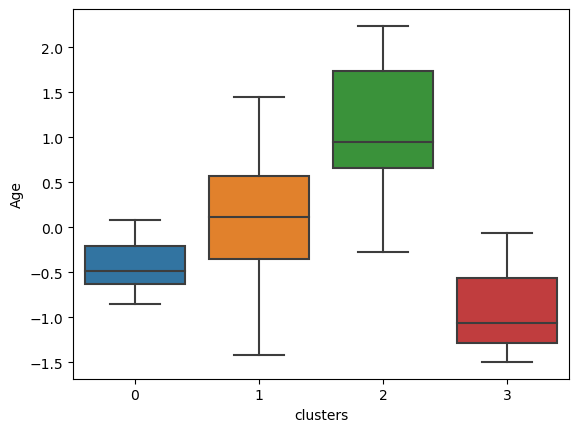

In [92]:
sns.boxplot(data_final['clusters'], data_final['Age'])
plt.show()